## CMSC 197 Problem Set <br>
### Implementing Linear Regression with Gradient Descent as Optimization Function

Submitted to: Ms. Ara Abigail Ambita <br>
Submitted by: Alyssa Alexandra Lee

In [77]:
#Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#For standardization
from sklearn import preprocessing
#For dividing the dataset into train and test sets  
from sklearn.model_selection import train_test_split    
#For checking MSE and r^2 values   
from sklearn.metrics import r2_score, mean_squared_error
#For the OLS results
from sklearn.linear_model import LinearRegression  

**Application Part:**

**First**, load Advertising.csv dataset using pandas.

In [78]:
#Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)
#Print the size of the data
print("Size of the data:", df.shape)
#Displays the first five rows of the dataframe
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [79]:
#We will use the describe function to get the summary of the data statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Second**, standardize each column of the dataset.

In [80]:
#Doing it manually

#Temporary dataframe that contains the standardized values
temp_df = df.copy()

#For the TV
tv_mean = temp_df['TV'].mean()
tv_std = temp_df['TV'].std()
temp_df['TV'] = (temp_df['TV'] - tv_mean) / tv_std

#For the Radio
radio_mean = temp_df['Radio'].mean()
radio_std = temp_df['Radio'].std()
temp_df['Radio'] = (temp_df['Radio'] - radio_mean) / radio_std

#For the Newspaper
newspaper_mean = temp_df['Newspaper'].mean()
newspaper_std = temp_df['Newspaper'].std()
temp_df['Newspaper'] = (temp_df['Newspaper'] - newspaper_mean) / newspaper_std

#For the Sales
sales_mean = temp_df['Sales'].mean()
sales_std = temp_df['Sales'].std()
temp_df['Sales'] = (temp_df['Sales'] - sales_mean) / sales_std

temp_df

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


We will be using the one below which utilizes **sklearn**:

In [81]:
#Alternative way - using sklearn's preprocessing.scale function
df_standardize = preprocessing.scale(df)

#Convert standardized data to dataframe
df_standardize = pd.DataFrame(df_standardize, columns = df.columns)

df_standardize

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


**Third**, add an extra column composing of all ones to X.

In [82]:
df_standardize.insert(0, 'all_ones', 1)
df_standardize

,all_ones,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


**Fourth**, divide the dataset into training and testing, with 0.75 and 0.25 ratio, respectively. 

In [83]:
#Feature Selection
features = df_standardize[['all_ones', 'TV', 'Radio', 'Newspaper']]
#Sales column - target or response variable
target = df_standardize['Sales']
#0.75 or 75% for training and 0.25 or 25% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.75, test_size = 0.25)

**Fifth**, fit the model on the training set.

**Required Functions:**

1. initialize_weights


In [84]:
def initialize_weights(X, random = False):
    #length of the weights = no. of columns in x
    X_len = X.shape[1]
    #If random = True, the weights will be initialized randomly
    if random:
        return np.random.rand(X_len)
    #Otherwise, the weights will be initialized to zero
    return np.zeros(X_len)

In [85]:
#Testing the said function

#If the weights are initialized randomly,
weights = initialize_weights(X_train, random = True)
weights

array([0.61553757, 0.65148555, 0.50754463, 0.94742556])

In [86]:
#Testing the said function

#If the weights are initialized to zeros,
weights = initialize_weights(X_train)
weights

array([0., 0., 0., 0.])

2. predict

In [87]:
def predict(X, weights):
    #Using numpy's dot product function to multiply every weight to its interrelated feature from x
    return np.dot(X, weights)

In [88]:
#Predict the training set's values using a random set of weights
y_hat_train = predict(X_train, initialize_weights(X_train, random = True))
#Comparing the predicted and actual values through a new dataframe
df_train = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
df_train

,Actual Values,Predicted Values
139,1.283050,1.015313
136,-0.868977,0.763456
132,-1.599129,0.269994
120,0.283895,0.956492
99,0.610541,1.431185
...,...,...
102,0.149393,0.268380
174,-0.484686,-0.119881
16,-0.292541,2.026907
165,-0.407828,0.779288


3. compute_cost

In [105]:
def compute_cost(X, y, weights):  
    #Initialize the length of the response
    m = len(y)

    #Solve for the cost function using the given formula
    cost_function = 1/(2*m) * np.sum((predict(X, weights) - y)**2)
    return cost_function

In [187]:
#Print the cost function of the training set utilizing a random set of weights
cost_test = compute_cost(X_train, y_train, initialize_weights(X_train, random = True))
print(cost_test)

0.943156063137087


The cost is 0.943156 which indicates that our model is not yet accurate.

As of now, our model is not yet accurate because the predicted values and actual values are sometimes close and sometimes far when compared. In this problem set, we will try to improve the model's accuracy by utilizing the gradient descent algorithm.

P.S. In the test that we had in the predict function, the cost is different since we initialized the weights in this case again.

4. compute_gradient

In [91]:
def compute_gradient(X, y, weights):
    m = len(y)
    w = 1/m * np.dot(X.T, (predict(X, weights) - y))
    #returns matrix w
    return w

5. update_weights

In [92]:
def update_weights(X, y, weights, alpha):
    return weights - alpha * compute_gradient(X, y, weights)

6. grad_descent

In [93]:
def grad_descent(X, y, weights, alpha, iterations):
    #Initialization of the two matrices
    weights_matrix = [0] * iterations
    cost_matrix = [0] * iterations

    #Looping through the no. of iterations
    #Utilizing the batch gradient descent
    for j in range(iterations):
        #Updating weights
        weights = update_weights(X, y, weights, alpha)
        #Store the weights in the weights matrix
        weights_matrix[j] = weights
        #Computing cost
        cost = compute_cost(X, y, weights)
        #Store the cost in the cost matrix
        cost_matrix[j] = cost
    return weights_matrix, cost_matrix

7. plot_costs

In [201]:
def plot_costs(cost_array):
    #Size of the plot
    plt.figure(figsize=(15,8))
    plt.plot(cost_array)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over Iterations')
    plt.show()

8. Predict y for train set and calculate the cost.

In [211]:
weights = initialize_weights(X_train, random = True)
y_hat_train = predict(X_train, weights)
y_hat_train_df = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
y_hat_train_df

,Actual Values,Predicted Values
139,1.283050,1.093196
136,-0.868977,0.322460
132,-1.599129,-0.212292
120,0.283895,1.091904
99,0.610541,1.489211
...,...,...
102,0.149393,0.872801
174,-0.484686,0.277500
16,-0.292541,2.093016
165,-0.407828,1.458595


In [212]:
#Solve for the cost of the predicted values
train_cost = compute_cost(X_train, y_train, weights)
train_cost

0.4291783012424459

Based on utilizing the weights from the last iteration, the cost is 0.429178 which indicates that the model's prediction could still be improved. 

9. Predict y for test set and calculate the cost.

In [238]:
weights = initialize_weights(X_test, random = True)
y_hat_test = predict(X_test, weights)
y_hat_test_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_hat_test})
y_hat_test_df['Residual Values'] = y_hat_test_df['Actual Values'] - y_hat_test_df['Predicted Values']
y_hat_test_df

,Actual Values,Predicted Values,Residual Values
171,0.091749,0.841219,-0.749470
128,2.051631,2.406941,-0.355310
101,1.878700,3.020348,-1.141648
35,-0.234898,0.268366,-0.503263
135,-0.465472,1.303431,-1.768902
72,-1.003478,0.458650,-1.462129
178,-0.427043,0.218433,-0.645475
62,0.322324,0.793750,-0.471426
119,-1.426198,-0.547028,-0.879170
93,1.571268,2.496390,-0.925122


In [239]:
#Solve for the cost of the predicted values
test_cost = compute_cost(X_test, y_test, weights)
test_cost

0.5688402747463988

The test cost (0.568840) is not that favorable thus this shows that this approach has limitations. Later, we will improve it using the gradient descent algorithm. 

**Sixth**, predict the quantitative response y on the train set. Evaluate performance. You can use
the MSE cost function defined for the gradient descent.

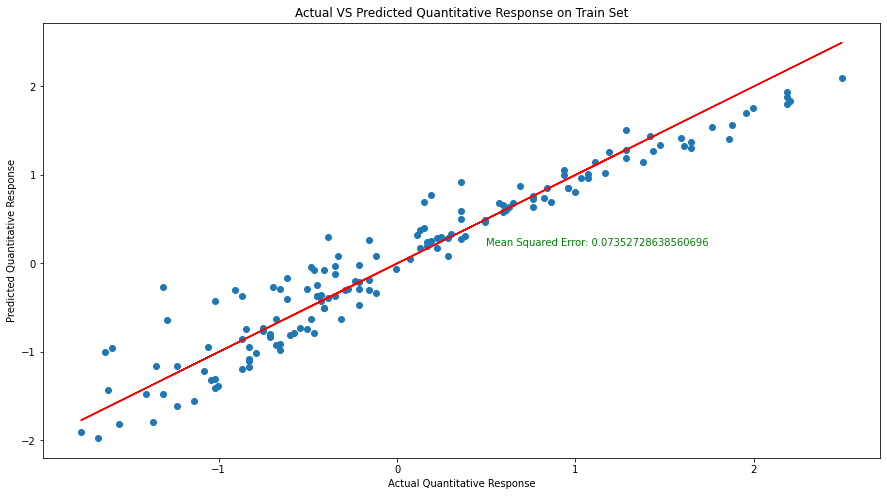

In [99]:
weights = initialize_weights(X_train, random = True)

#Initialize alpha and the number of iterations
alpha = 0.01
iterations = 10000                          

#Run the gradient descent algorithm (both in Training and Testing)
weights_matrix_training, cost_matrix_training = grad_descent(X_train, y_train, weights, alpha, iterations)
weights_matrix_testing, cost_matrix_testing = grad_descent(X_test, y_test, weights, alpha, iterations)

#Predict the quantitative response using the train set
y_hat_train = predict(X_train, weights_matrix_training[-1])

#For Plotting
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Train Set')
plt.scatter(y_train, y_hat_train)
#Line of Best Fit
plt.plot(y_train, y_train, color="red")
#Print out the Mean Squared Error
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_train, y_hat_train)}", color='green')
plt.show()

**Evaluation**: The Mean Squared Error (MSE) is 0.073527 which can be seen above. The closer the value of MSE to zero, the more accurate the model is. Therefore, we can conclude that our model is already good.

**Seventh**, predict the quantitative response y on the test set. Evaluate performance. Similarly, you
can use the MSE cost function defined for the gradient descent.

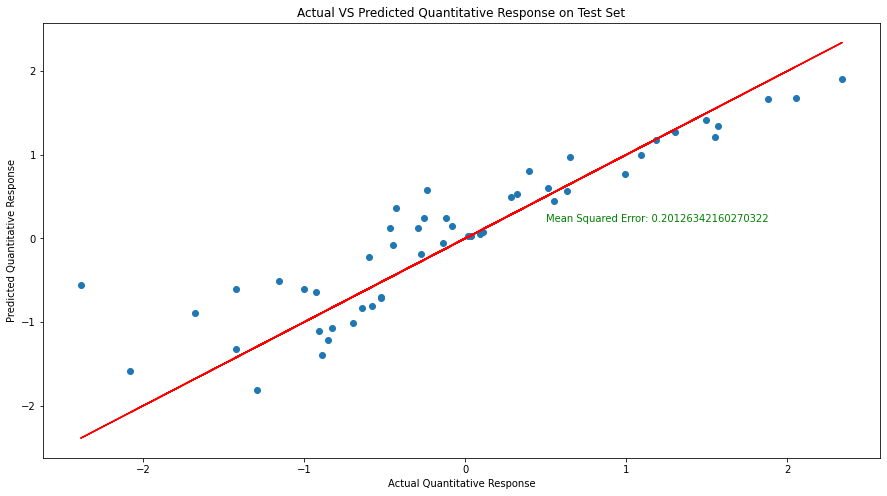

In [100]:
#Predict the quantitative response using the test set
y_hat_test = predict(X_test, weights_matrix_training[-1])

#For Plotting
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Test Set')
plt.scatter(y_test, y_hat_test)
#Line of Best Fit
plt.plot(y_test, y_test, color="red")
#Print out the Mean Squared Error
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_test, y_hat_test)}", color='green')
plt.show()

**Evaluation**: The Mean Squared Error is 0.201263. It indicates that our model which was trained using the training set was able to predict the test set with a good accuracy. But the MSE in the test dataset is greater than the MSE in our train dataset thus it indicates that it is not better. 

**Eighth**, we will predict the sales on the actual dataset using the model.

In [101]:
df_standardize

#Add a new column which is the predicted sales
df_standardize['Predicted Sales'] = predict(df_standardize[['all_ones', 'TV', 'Radio', 'Newspaper']], weights_matrix_training[-1])

#Revert back the standardized data into the original form 
df_standardize['TV'] = df_standardize['TV'] * df['TV'].std() + df['TV'].mean()
df_standardize['Radio'] = df_standardize['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_standardize['Newspaper'] = df_standardize['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_standardize['Sales'] = df_standardize['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standardize['Predicted Sales'] = df_standardize['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()

#Insert Residuals column
df_standardize['Residuals'] = df_standardize['Sales'] - df_standardize['Predicted Sales']

# Drop all_ones column
df_standardize.drop('all_ones', axis = 1, inplace = True)

df_standardize

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.308426,37.836477,69.296979,22.120270,20.376519,1.743751
1,44.242678,39.340241,45.136502,10.390910,12.626315,-2.235405
2,16.874171,45.956803,69.397230,9.288149,12.471761,-3.183612
3,151.511186,41.345260,58.570128,18.511236,17.665403,0.845833
4,180.884712,10.768723,58.469877,12.897183,12.947077,-0.049893
...,...,...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883,5.620376,1.963507
196,94.067396,4.853917,8.043654,9.689153,8.414069,1.275084
197,177.075176,9.264959,6.339388,12.796932,12.996886,-0.199954
198,283.942679,42.047016,66.289451,25.528802,23.624673,1.904129


We can say that our model is accurate enough because the residual values are not far from each other.

**Ninth**, observe the cost results and analyse.

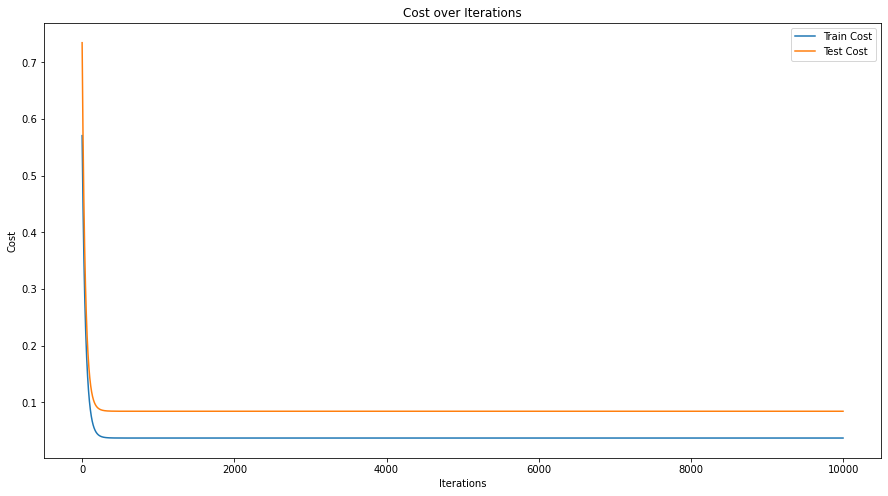

In [240]:
plt.figure(figsize=(15,8))
plt.plot(cost_matrix_training, label='Train Cost')
plt.plot(cost_matrix_testing, label='Test Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.legend()
plt.show()

What I analyzed and derived from the plot is that cost function value decreases as the iterations increase thus our model becomes more accurate if there are more iterations. Also, gradual descent of the cost value can be observed.

**Questions**:

1.

In [241]:
#Zero weights as initial weights
w = initialize_weights(X_train)

#Learning rate and the no. of iterations
alpha = 0.01    
iterations = 50000    #as stated in the guide                                               

#Running the gradient descent algorithm
we, co = grad_descent(X_train, y_train, w, alpha, iterations)

#Getting the optimal weights
optimal_weights = we[-1]

#Printing the optimal weights
print(f"Optimal Weights: {optimal_weights}")

#Plugging it into the linear model
print(f"hΘ(x) = {optimal_weights[0]} + {optimal_weights[1]}*TV + {optimal_weights[2]}*Radio + {optimal_weights[3]}*Newspaper")

Optimal Weights: [ 0.03007423  0.73276853  0.56093533 -0.04130745]
hΘ(x) = 0.030074231293721027 + 0.732768529334593*TV + 0.5609353278672755*Radio + -0.04130744510788957*Newspaper


2.

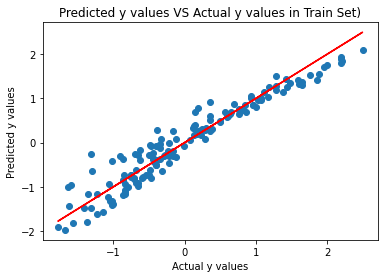

In [242]:
#Scatterplot of actual y values VS predicted y values in the train set
predict_train = predict(X_train, optimal_weights)
plt.scatter(y_train, predict_train)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Predicted y values VS Actual y values in Train Set)')
plt.plot(y_train, y_train, color='red')
plt.show()

In [247]:
#r2 score of the train set
print(f"The r2 score is {r2_score(y_train, predict_train)}")

The r2 score is 0.9237663364290245


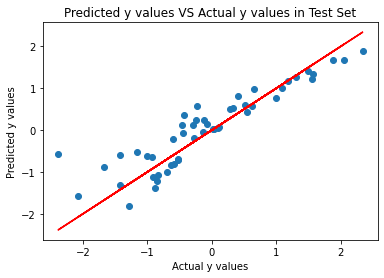

In [244]:
#Scatterplot of actual y values VS predicted y values in the test set
predict_test = predict(X_test, optimal_weights)
plt.scatter(y_test, predict_test)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Predicted y values VS Actual y values in Test Set')
plt.plot(y_test, y_test, color='red')
plt.show()

In [246]:
#r2 score of the test set
print(f"The r2 score is {r2_score(y_test, predict_test)}")

The r2 score is 0.8166386301732071


3.

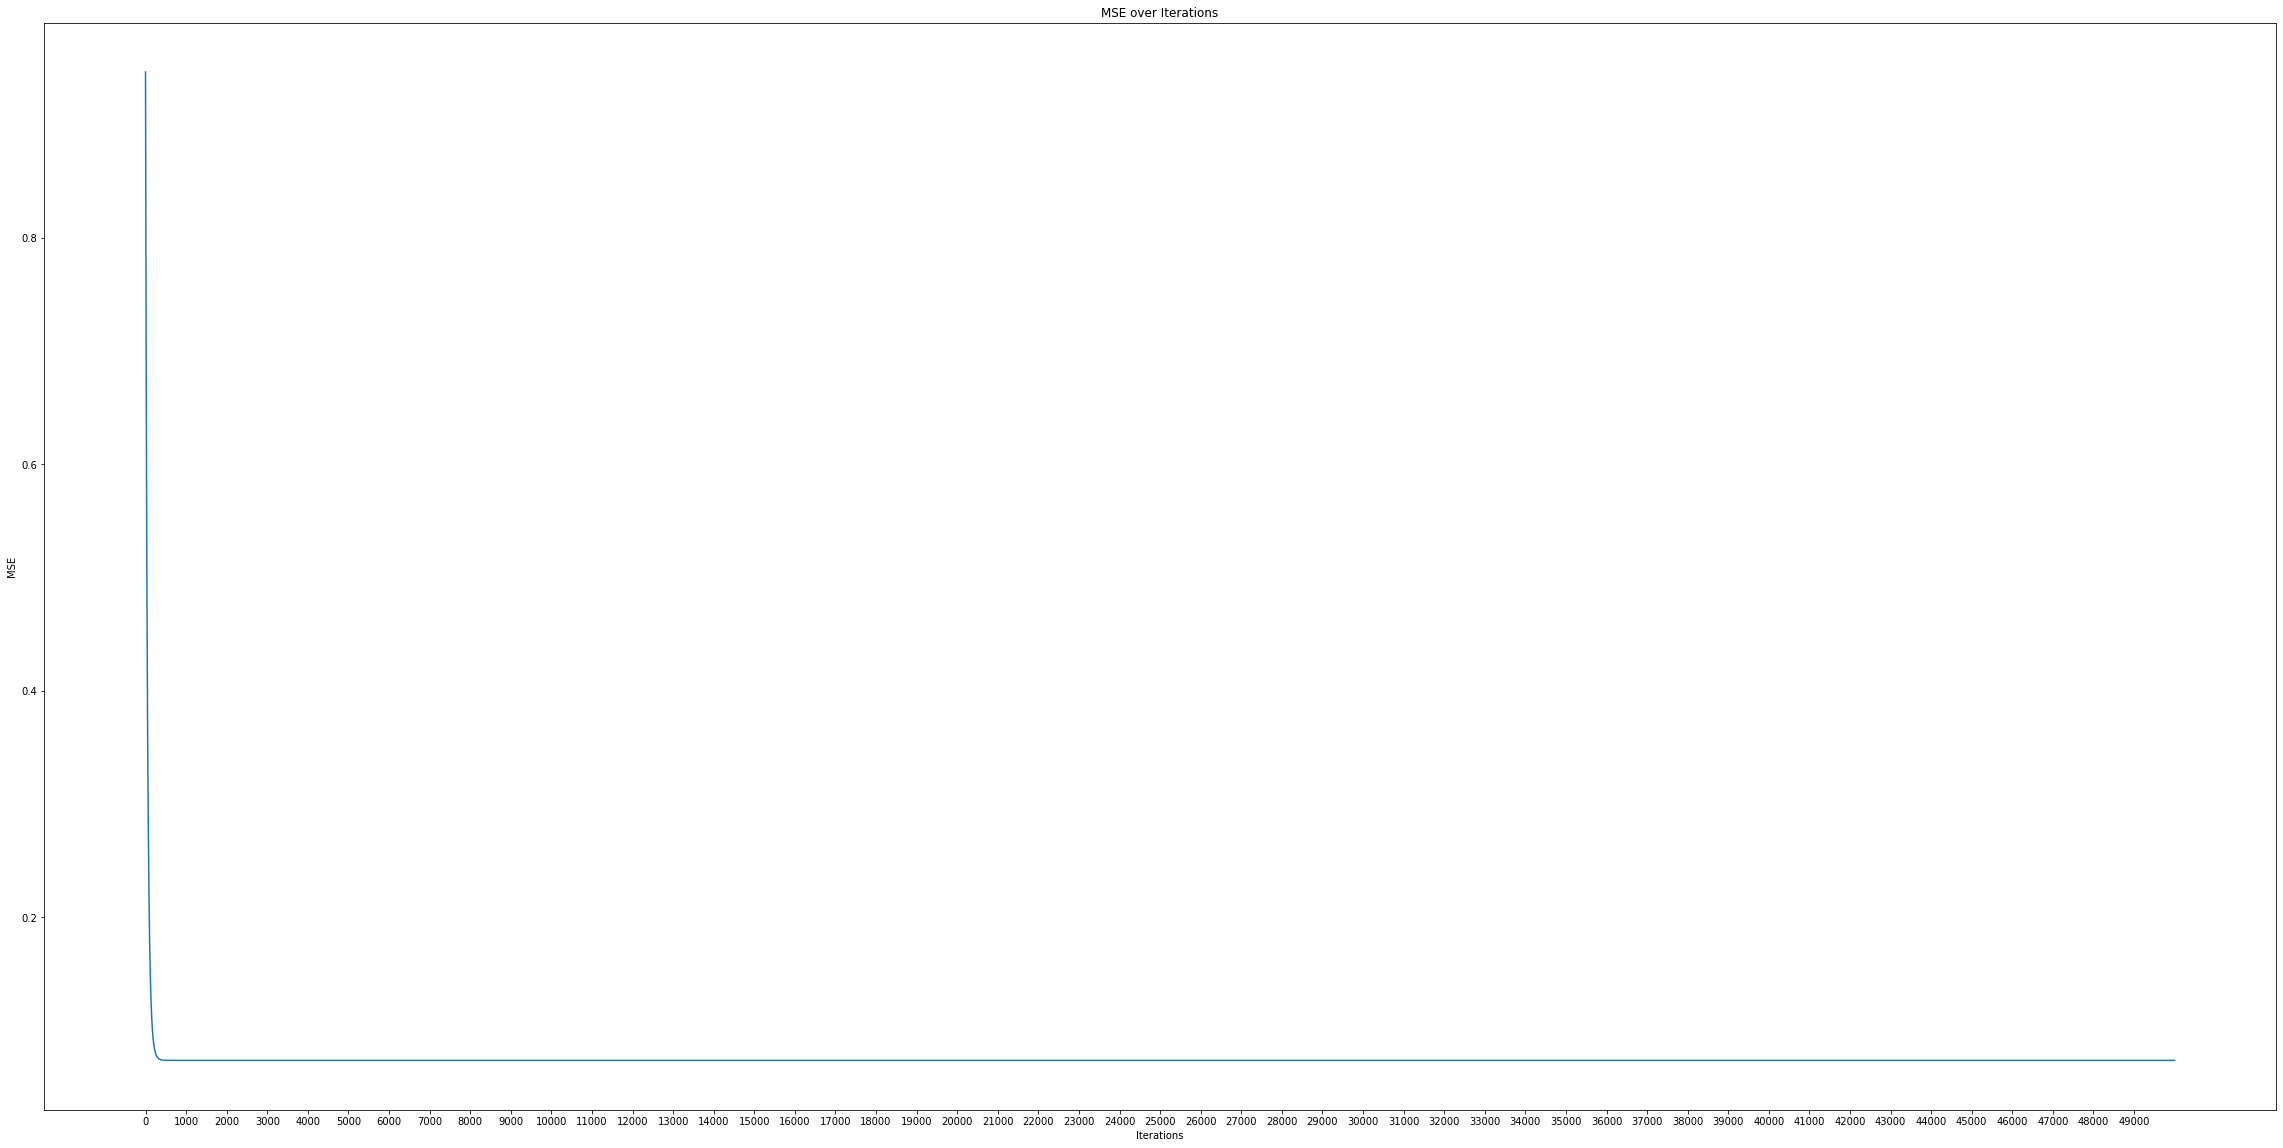

In [248]:
#Solve for the MSE for each iterations
#Utilizing sklearn
MSE_arr = []
for j in range(iterations):
    MSE = mean_squared_error(y_train, predict(X_train, we[j]))
    MSE_arr.append(MSE)

#Plotting it
plt.figure(figsize=(40,20))
plt.plot(MSE_arr)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE over Iterations')
plt.xticks(np.arange(0, iterations, 1000))
plt.show()

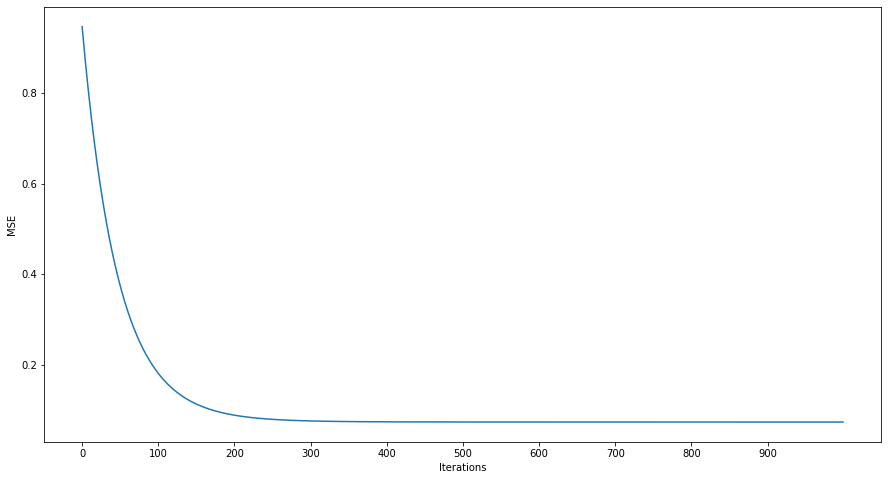

In [249]:
#Zoomed version of the plot to be able to see the gradient descent clearly
#MSE over iterations (first 1000 only)
plt.figure(figsize=(15,8))
plt.plot(MSE_arr[0:1000])
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xticks(np.arange(0, 1000, 100))
plt.show()

Based on the given plot above, we can infer that 400 iterations is enough to predict the sales. This may not be the optimal number of iterations but we will calculate this later through the r^2 score.

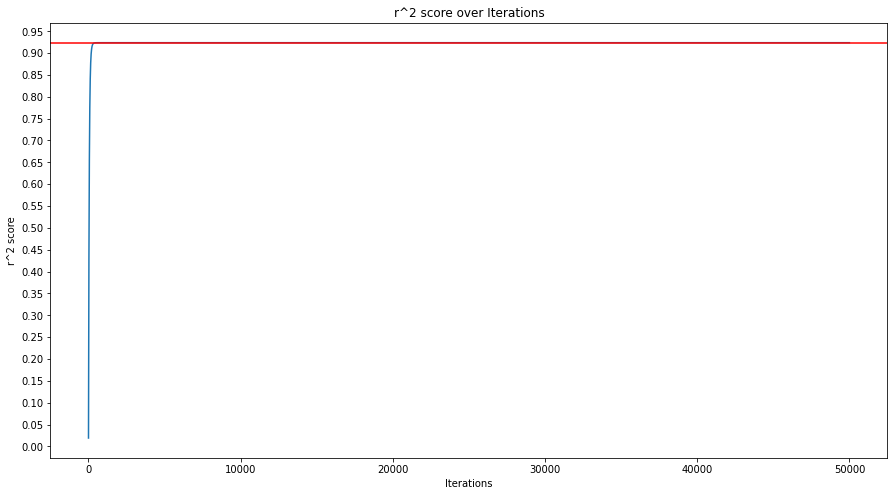

The maximum r^2 score is 0.9237663364290245


In [250]:
#Calculating the r^2 score for every iteration
r2_arr = []
for j in range(iterations):
    r2 = r2_score(y_train, predict(X_train, we[j]))
    r2_arr.append(r2)

#Plotting it
plt.figure(figsize=(15,8))
plt.plot(r2_arr)
plt.xlabel('Iterations')
plt.ylabel('r^2 score')
plt.title('r^2 score over Iterations')
plt.yticks(np.arange(0, 1, 0.05))
#Marking the maximum r^2 score
plt.axhline(y=max(r2_arr), color='red')
plt.show()

# Printing the max r^2 score
print(f"The maximum r^2 score is {max(r2_arr)}")

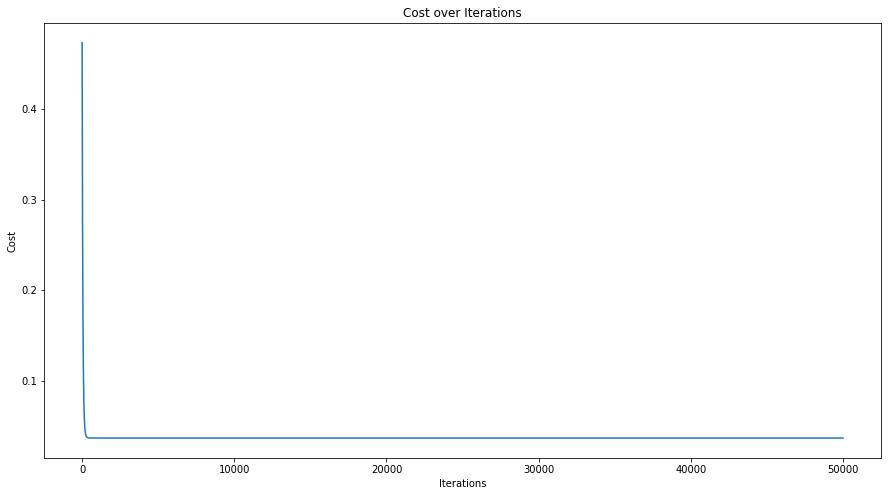

In [251]:
#Plotting the cost over iterations
plot_costs(co)

In [252]:
#Determining the optimal number of iterations
def optimal_iterations(max_r2, r2_arr):
    for j in range(len(r2_arr)):
        if r2_arr[j] == max_r2:
            return j

optimal_num = optimal_iterations(max(r2_arr), r2_arr)
print(f"The optimal number of iterations is {optimal_num}")

The optimal number of iterations is 2873


In [253]:
#Cost at the optimal number of iterations
print(f"The cost at the optimal number of iterations is {co[optimal_num]}")
#Weights at the optimal number of iterations
print(f"The weights at the optimal number of iterations are {we[optimal_num]}\n")

#Last iteration
print(f"The cost at the last iteration is {co[-1]}")
print(f"The weights at the last iteration are {we[-1]}")

The cost at the optimal number of iterations is 0.03676364319280351
The weights at the optimal number of iterations are [ 0.03007423  0.73276853  0.56093532 -0.04130744]

The cost at the last iteration is 0.03676364319280348
The weights at the last iteration are [ 0.03007423  0.73276853  0.56093533 -0.04130745]


It can be seen that there's no significant difference between the r^2 score and cost at the optimal number of iterations which is 2873 and the number of iterations that we chose which is 50, 000. 

We can improve this by redefining our gradient descent function to stop when the cost score reaches a certain difference threshold.

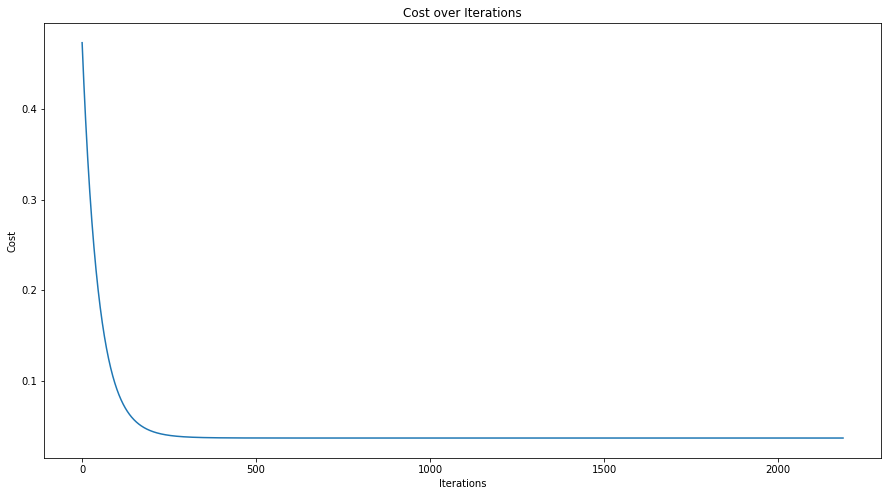

In [254]:
#Optimized Gradient Descent Algorithm
def optimized_gda(X, y, weights, alpha, iterations, diff_threshold):
    last_iter = 0
    we = []
    co = []

    for j in range(iterations):
        weights = update_weights(X, y, weights, alpha)
        we.append(weights)
        cost = compute_cost(X, y, weights)
        co.append(cost)

        if j > 0 and diff_threshold > abs(co[j] - co[j - 1]):
            last_iter = j
            break
        last_iter = j
    
    return we, co, last_iter

iterations = 50000
alpha = 0.01

diff_threshold = 1.0e-15

we, co, optimal_iterations = optimized_gda(X_train, y_train, w, alpha, iterations, diff_threshold)

plot_costs(co)

4.

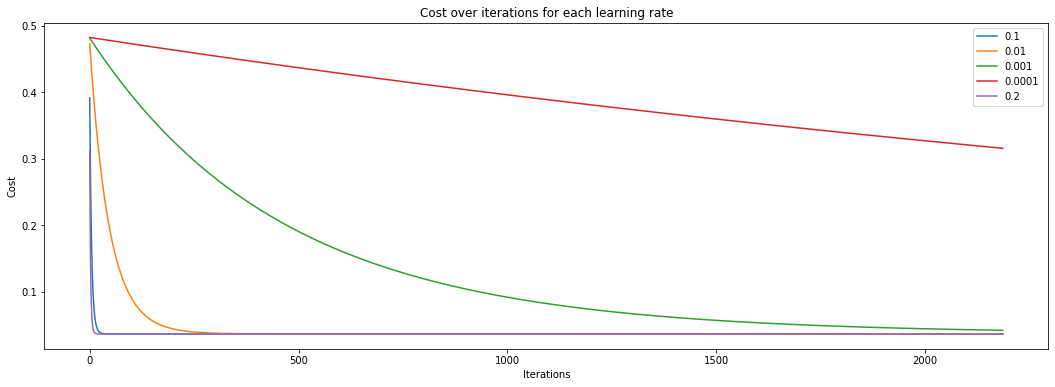

In [255]:
w = initialize_weights(X_train)

iterations = optimal_iterations

#Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

cost_dict = {j:0 for j in learning_rates}
error_dict = {j:0 for j in learning_rates}
co_dict = {j:[] for j in learning_rates}

for alpha in learning_rates:
    we, co = grad_descent(X_train, y_train, w, alpha, iterations)
    cost_dict[alpha] = co[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, we[-1]))
    co_dict[alpha] = co

plt.figure(figsize=(18,6))
for alpha in learning_rates:
    plt.plot(co_dict[alpha], label = alpha)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over iterations for each learning rate')
plt.legend()
plt.show()

In [259]:
learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'Error': list(error_dict.values())})
learning_rates

,Learning Rate,Cost,Error
0,0.1000,0.036764,0.073527
1,0.0100,0.036764,0.073527
2,0.0010,0.042254,0.084508
3,0.0001,0.315916,0.631832
4,0.2000,0.036764,0.073527


5.

In [260]:
w = initialize_weights(X_train)

iterations = 1_000_000

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

cost_dict = {j:0 for j in learning_rates}
error_dict = {j:0 for j in learning_rates}
co_dict = {j:[] for j in learning_rates}
opt_dict = {j:0 for j in learning_rates}

diff_threshold = 1.0e-15

for alpha in learning_rates:
    we, co, optimal_iterations = optimized_gda(X_train, y_train, w, alpha, iterations, diff_threshold)

    cost_dict[alpha] = co[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, we[-1]))
    co_dict[alpha] = co
    opt_dict[alpha] = optimal_iterations

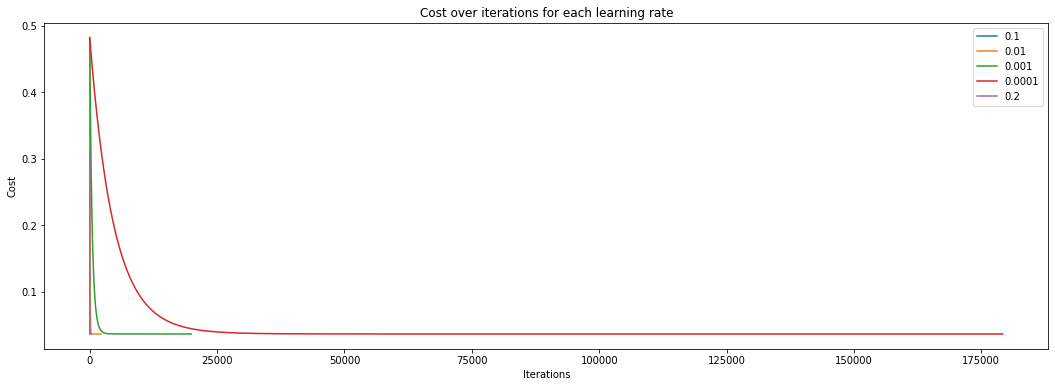

In [261]:
    plt.figure(figsize=(18,6))
    for alpha in learning_rates:
        plt.plot(co_dict[alpha], label = alpha)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over iterations for each learning rate')
    plt.legend()
    plt.show()

6.

In [262]:
#Ordinary Least Squares Function
from sklearn.linear_model import LinearRegression
ordinary_least_squares = LinearRegression()
ordinary_least_squares.fit(X_train, y_train).coef_

#r^2 score for the Ordinary Least Squares and the Gradient Descent Algorithm
r2_OLS = r2_score(y_train, ordinary_least_squares.predict(X_train))
r2_GDA = r2_arr[-1]

print(f"The results of OLS is {r2_OLS}")
print(f"The results of GDA is {r2_GDA}")

The results of OLS is 0.9237663364290245
The results of GDA is 0.9237663364290245
